In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
padi = pd.read_csv('finalProject.csv')
padi.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
X = padi.iloc[:, :-1].values
y = padi.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
padi['Provinsi'] = encode.fit_transform(padi['Provinsi'])

padi

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,0,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,0,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,0,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,0,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,0,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,3,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,3,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,3,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,3,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [ ]:
# convert data
padi['Provinsi']=padi['Provinsi'].fillna(padi['Provinsi'].mode()[0])

In [ ]:
padi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    int64  
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 12.4 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

padi['Provinsi'] = encode.fit_transform(padi['Provinsi'])

In [ ]:
print(padi)

     Provinsi  Tahun    Produksi  Luas Panen  Curah hujan  Kelembapan  \
0           0   1993  1329536.00   323589.00       1627.0       82.00   
1           0   1994  1299699.00   329041.00       1521.0       82.12   
2           0   1995  1382905.00   339253.00       1476.0       82.72   
3           0   1996  1419128.00   348223.00       1557.0       83.00   
4           0   1997  1368074.00   337561.00       1339.0       82.46   
..        ...    ...         ...         ...          ...         ...   
219         3   2016  3831923.00   390799.00       2317.6       79.40   
220         3   2017  4090654.00   396559.00       1825.1       77.04   
221         3   2018  2488641.91   511940.93       1385.8       76.05   
222         3   2019  2164089.33   464103.42       1706.4       78.03   
223         3   2020  2604913.29   545149.05       2211.3       75.80   

     Suhu rata-rata  
0             26.06  
1             26.92  
2             26.27  
3             26.08  
4            

In [ ]:
# deskripsi data dengan bentuk tampilan dibalik dari umumnya
padi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Provinsi,224.0,3.500000e+00,2.296420e+00,0.00,1.7500,3.500,5.25,7.00
Tahun,224.0,2.006500e+03,8.095838e+00,1993.00,1999.7500,2006.500,2013.25,2020.00
Produksi,224.0,1.679701e+06,1.161387e+06,42938.00,548857.0000,1667773.000,2436850.75,4881089.00
Luas Panen,224.0,3.743500e+05,2.327512e+05,63142.04,146919.5000,373551.500,514570.25,872737.00
Curah hujan,224.0,2.452491e+03,1.031973e+03,222.50,1703.5250,2315.700,3039.70,5522.00
Kelembapan,224.0,8.094871e+01,4.878680e+00,54.20,78.9750,82.375,84.00,90.60
Suhu rata-rata,224.0,2.680196e+01,1.197041e+00,22.19,26.1775,26.730,27.20,29.85


In [ ]:
padi.shape

(224, 7)

In [ ]:
# penentuan variabel X dan y
X = padi.drop('Provinsi',axis=1)
y = padi['Provinsi']

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

DATA PREPOCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# fitting pada data training

scaler.fit(X_train)

StandardScaler()

In [ ]:
# standarisasi
StandardScaler(copy=True, with_mean=True, with_std=True)

# transformasi data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training Model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# pada parameter hidden_layer_sizes, tentukan jumlah neuron yang diperlukan pada setiap layer.
# Pada contoh ini hanya digunakan 3 buah layer dengan jumlah iterasi maksimal sebanyak 500 kali

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


# fitting data tarining terhadap mlp
mlp.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[6 0 0 0 0 0 0 0]
 [0 6 1 0 4 0 0 0]
 [0 2 3 0 5 0 0 0]
 [0 0 0 3 0 0 0 1]
 [0 4 1 0 1 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 3 0 0 2 3]
 [0 0 0 1 0 0 0 6]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      0.55      0.52        11
           2       0.60      0.30      0.40        10
           3       0.43      0.75      0.55         4
           4       0.10      0.17      0.12         6
           5       1.00      1.00      1.00         4
           6       1.00      0.25      0.40         8
           7       0.60      0.86      0.71         7

    accuracy                           0.55        56
   macro avg       0.65      0.61      0.59        56
weighted avg       0.64      0.55      0.55        56



In [ ]:
from keras import backend as K
X_train1 = K.cast_to_floatx(X_train)
y_train1 = K.cast_to_floatx(y_train)

In [ ]:
#Fitting ANN
model = ann.fit(X_train1,y_train1,batch_size=32,epochs = 100)

Epoch 1/100
6/6 [==============================] - 0s 6ms/step - loss: 10.8812 - mean_squared_logarithmic_error: 0.8112
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 10.5121 - mean_squared_logarithmic_error: 0.7701
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 10.1306 - mean_squared_logarithmic_error: 0.7295
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 9.7539 - mean_squared_logarithmic_error: 0.6920
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 9.3818 - mean_squared_logarithmic_error: 0.6577
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 8.9976 - mean_squared_logarithmic_error: 0.6231
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 8.6291 - mean_squared_logarithmic_error: 0.5918
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 8.2650 - mean_squared_logarithmic_error: 0.5629
Epoch 9/100
6/6 [============================

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sklearn.metrics
evs_no=sklearn.metrics.explained_variance_score(y_test,ann.predict(X_test))
me_no=sklearn.metrics.max_error(y_test,ann.predict(X_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test,ann.predict(X_test))
mse_no=sklearn.metrics.mean_squared_error(y_test,ann.predict(X_test))
msle_no=sklearn.metrics.mean_squared_log_error(y_test,ann.predict(X_test))
Mae_no=sklearn.metrics.median_absolute_error(y_test,ann.predict(X_test))
r2_no=sklearn.metrics.r2_score(y_test,ann.predict(X_test))
mpd_no=sklearn.metrics.mean_poisson_deviance(y_test,ann.predict(X_test))
mtd_no=sklearn.metrics.mean_tweedie_deviance(y_test,ann.predict(X_test))

2/2 [==============================] - 0s 6ms/step


In [ ]:
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('Median Absolute Error   :',Mae_no)
print('R2 Score                :',r2_no)
print('Mean Poisson Deviance   :',mpd_no)
print('Mean Tweedie Deviance   :',mtd_no)

Explained Variance Score: 0.4520462392554848
Max Error               : 3.5131285190582275
Mean Absolute Error     : 1.383223831653595
Mean Square Error       : 3.0379450795002856
Mean Squared Log Error  : 0.3221906268992859
Median Absolute Error   : 1.19334077835083
R2 Score                : 0.45019645837298616
Mean Poisson Deviance   : 1.4009505265152336
Mean Tweedie Deviance   : 3.0379450795002856


dict_keys(['loss', 'mean_squared_logarithmic_error'])


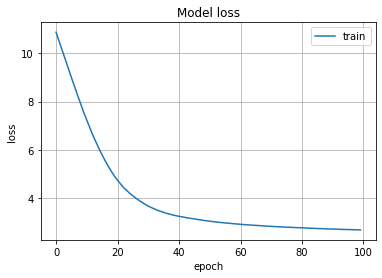

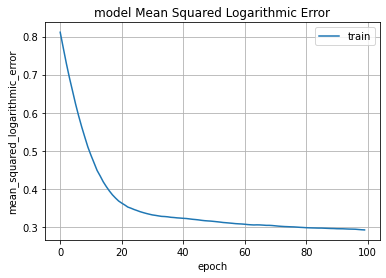

In [ ]:
# list all data in history
print(model.history.keys())
plt.plot(model.history['loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()